# Multilinear Interpolation Comparison

### Imports

In [16]:
%pip install interpolation
%pip install -e .
%pip install numba==0.59.1

import timeit

from matplotlib import pyplot as plt
import numpy as np
import scipy
import interpolation

import pymedphys


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Obtaining file:///C:/Users/Matthew/Workspace/pymedphys/lib/pymedphys/docs/users/howto/interp
Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/Matthew/Workspace/pymedphys/lib/pymedphys/docs/users/howto/interp does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numba==0.59.1 in c:\users\matthew\appdata\local\programs\python\python312\lib\site-packages (0.59.1)




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
def interp3d_econforge(axes, values, points):
    grid = interpolation.splines.CGrid(*axes)
    return interpolation.splines.eval_linear(grid, values, points)


In [18]:
def interp3d_scipy(axes, values, points):
    interpolator = scipy.interpolate.RegularGridInterpolator(axes, values)
    return interpolator(points)


In [19]:
def benchmark(n_values, interpolation_multiples):
    results = {
        "n_values": [],
        "interpolation_multiples": [],
        "PyMedPhys native time": [],
        "EconForge time": [],
        "Scipy time": [],
    }

    for n in n_values:
        for multiple in interpolation_multiples:
            x = y = z = np.linspace(0, 1, n, dtype=np.float64)
            values = np.random.rand(n, n, n)
            xi = yi = zi = np.linspace(0, 1, n * multiple)
            points = np.column_stack(
                [mgrid.ravel() for mgrid in np.meshgrid(xi, yi, zi, indexing="ij")]
            )

            results["n_values"].append(n)
            results["interpolation_multiples"].append(multiple)

            for method, name in [
                (pymedphys.interp3d, "PyMedPhys native time"),
                (interp3d_econforge, "EconForge time"),
                (interp3d_scipy, "Scipy time"),
            ]:
                time = (
                    timeit.timeit(
                        lambda: method(tuple((x, y, z)), values, points), number=3
                    )
                    / 3
                )
                results[name].append(time)

    return results


def plot_results(results, fixed_multiple=3, fixed_n=100):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    methods = ["PyMedPhys native time", "EconForge time", "Scipy time"]

    # Left plot: Performance vs n for fixed multiple
    for method in methods:
        mask = np.array(results["interpolation_multiples"]) == fixed_multiple
        ax1.plot(
            np.array(results["n_values"])[mask],
            np.array(results[method])[mask],
            label=method,
            marker="o",
        )

    ax1.set_xlabel("Number of known points (n)")
    ax1.set_ylabel("Time (seconds)")
    ax1.set_title(f"Performance vs. Number of Known Points (multiple={fixed_multiple})")
    ax1.legend()
    ax1.set_xscale("log")
    ax1.set_yscale("log")

    # Right plot: Performance vs multiple for fixed n
    for method in methods:
        mask = np.array(results["n_values"]) == fixed_n
        ax2.plot(
            np.array(results["interpolation_multiples"])[mask],
            np.array(results[method])[mask],
            label=method,
            marker="o",
        )

    ax2.set_xlabel("Interpolation Multiple")
    ax2.set_ylabel("Time (seconds)")
    ax2.set_title(f"Performance vs. Interpolation Multiple (n={fixed_n})")
    ax2.legend()
    ax2.set_xscale("log")
    ax2.set_yscale("log")

    plt.tight_layout()
    plt.show()


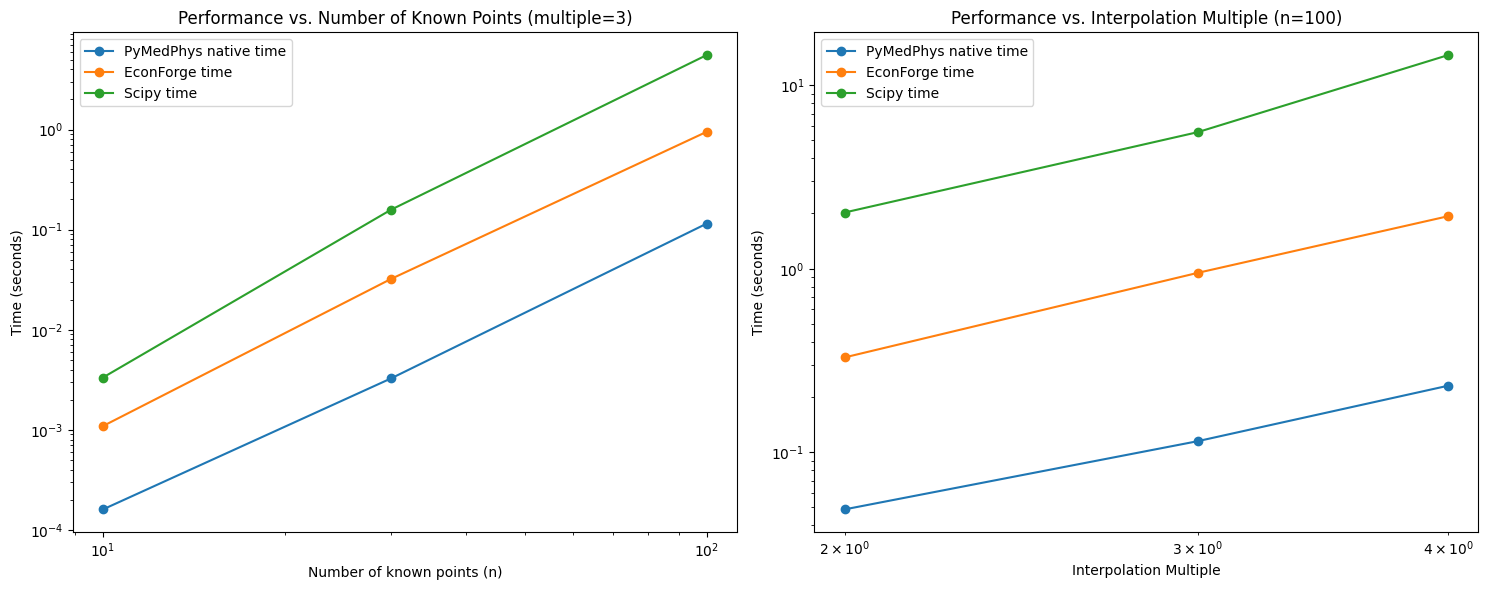

In [20]:
# Run the benchmark
n_values = [10, 30, 100]
interpolation_multiples = [2, 3, 4]
results = benchmark(n_values, interpolation_multiples)

# Plot the results
plot_results(results, fixed_multiple=3, fixed_n=100)
